# Time Series Analysis & Visualization - Website Traffic Data

Dataset: website_traffic_timeseries.csv

Metrics: Visitors, Page_Views, Bounce_Rate, Avg_Session_Duration

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [29]:
df = pd.read_csv('TimeSeries.csv', parse_dates=['Date'], index_col='Date')
print("Dataset loaded successfully")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset loaded successfully
            Visitors  Page_Views  Bounce_Rate  Avg_Session_Duration
Date                                                               
2022-01-01       519        1643        59.01                  2.06
2022-01-02       557        1496        60.26                  2.33
2022-01-03       604        1616        60.24                  1.87
2022-01-04       596        1550        59.40                  1.82
2022-01-05       457        1444        62.37                  1.98

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1399 entries, 2022-01-01 to 2025-10-30
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Visitors              1399 non-null   int64  
 1   Page_Views            1399 non-null   int64  
 2   Bounce_Rate           1399 non-null   float64
 3   Avg_Session_Duration  1399 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 54.6 KB


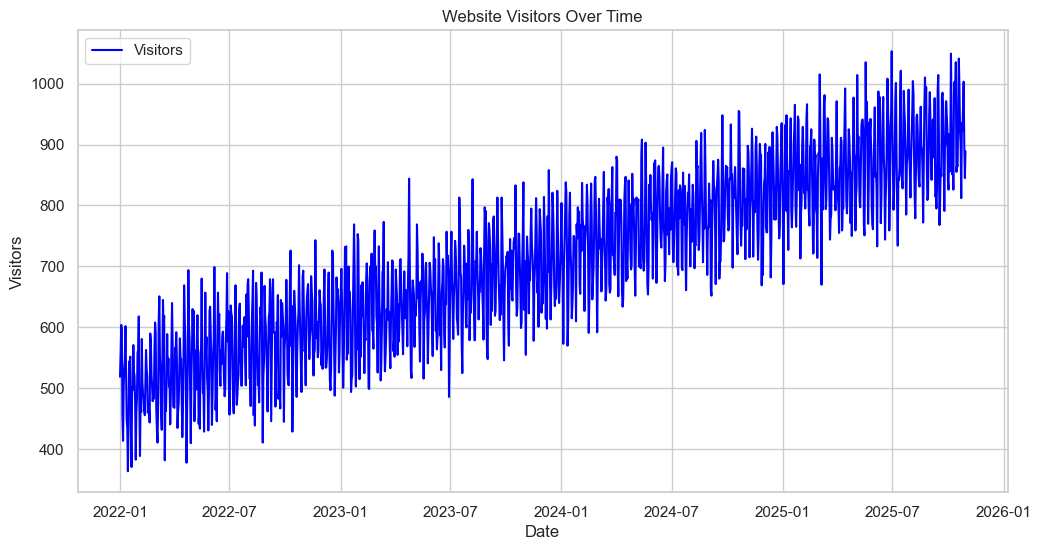

In [ ]:
# Plot Visitors Over Time
sns.set(style="whitegrid")

# Work on a copy of 'data' and normalize column names to avoid KeyError caused by extra whitespace
df = data.copy()
df.columns = df.columns.str.strip()

# Find the Date column (case-insensitive) and set it as datetime index
date_col = next((c for c in df.columns if c.strip().lower() == 'date'), None)
if date_col is None:
	raise KeyError(f"No 'Date' column found in data. Columns: {list(df.columns)}")

df[date_col] = pd.to_datetime(df[date_col])
df.set_index(date_col, inplace=True)

# Use cleaned Visitors column name (handles possible leading/trailing spaces)
vis_col = next((c for c in df.columns if c.strip().lower() == 'visitors'), 'Visitors')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y=vis_col, label='Visitors', color='blue')

plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Website Visitors Over Time')
plt.show()

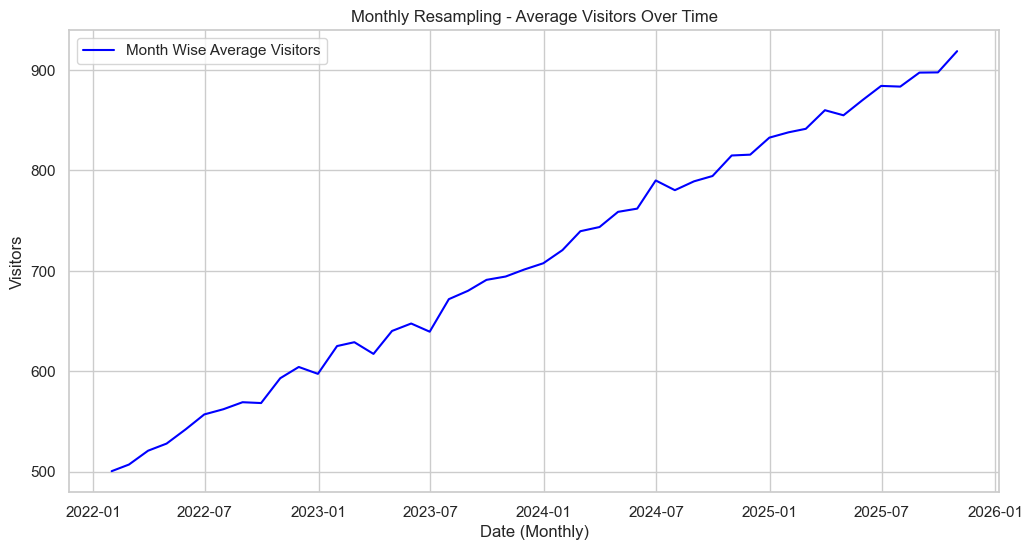

In [ ]:
# Resampling Data - Monthly Average
df_resampled = df.resample('ME').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='Visitors', label='Month Wise Average Visitors', color='blue')

plt.xlabel('Date (Monthly)')
plt.ylabel('Visitors')
plt.title('Monthly Resampling - Average Visitors Over Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

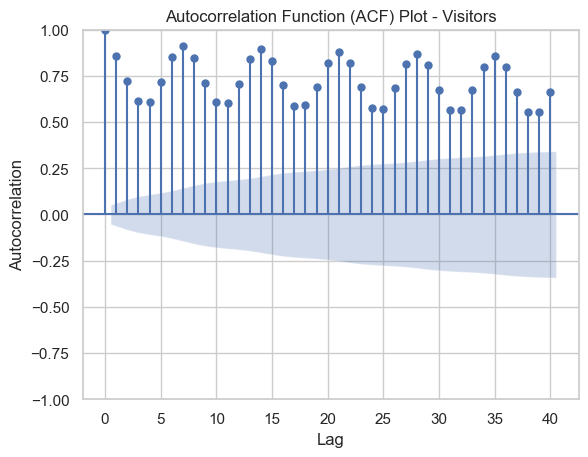

In [ ]:
# Detecting Seasonality with Autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(df['Visitors'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot - Visitors')
plt.show()

In [ ]:
# Testing Stationarity with ADF Test
result = adfuller(df['Visitors'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("\nConclusion: Data is stationary (reject null hypothesis)")
else:
    print("\nConclusion: Data is not stationary (accept null hypothesis)")

ADF Statistic: -0.6833898776458214
p-value: 0.851005150744033
Critical Values: {'1%': np.float64(-3.4351182379623975), '5%': np.float64(-2.8636458243979974), '10%': np.float64(-2.5678911385705416)}

Conclusion: Data is not stationary (accept null hypothesis)


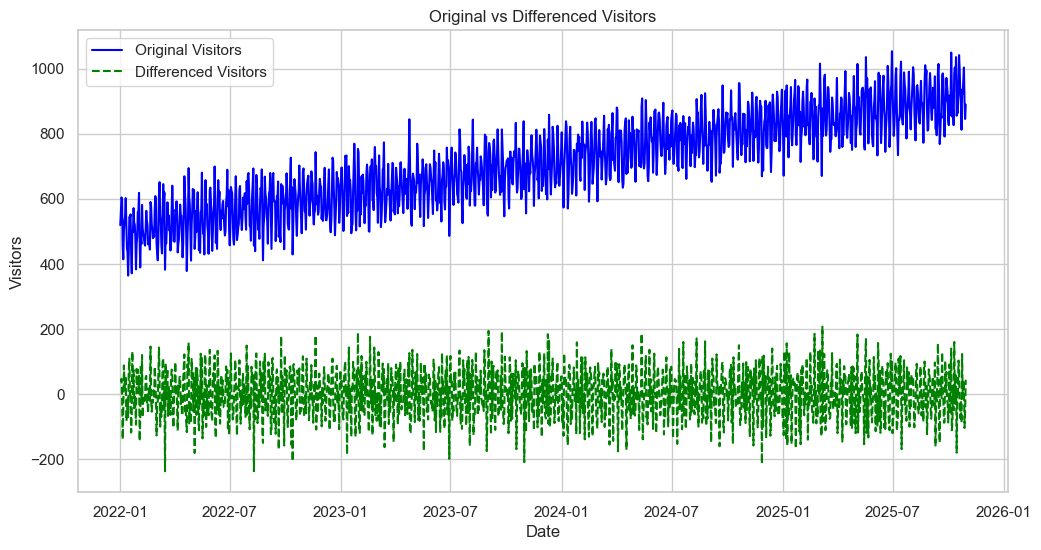

In [ ]:
# Differencing to Achieve Stationarity
df['visitors_diff'] = df['Visitors'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['Visitors'], label='Original Visitors', color='blue')
plt.plot(df['visitors_diff'], label='Differenced Visitors', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.show()

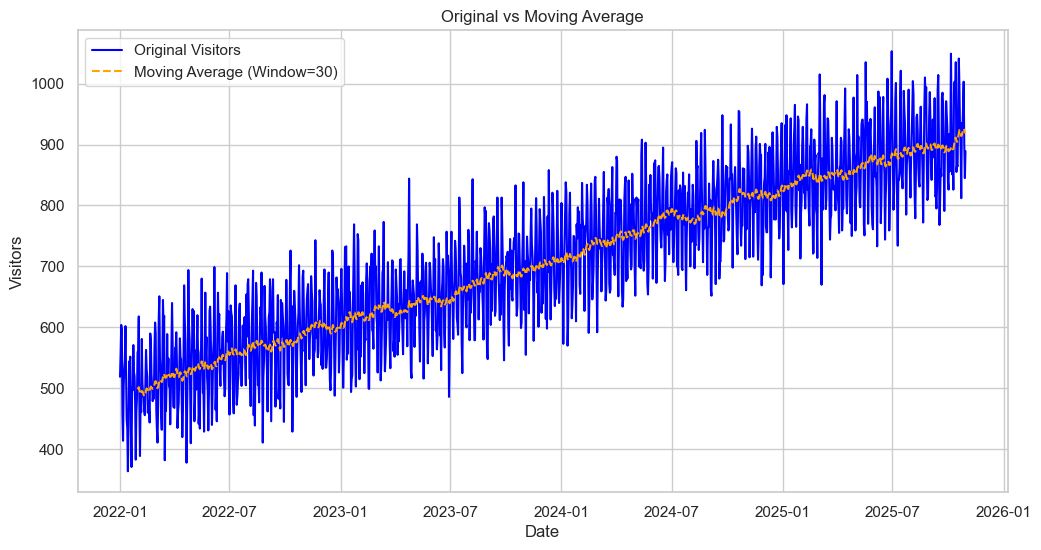

In [ ]:
# Smoothing Data with Moving Average
window_size = 30  # 30-day moving average
df['visitors_smoothed'] = df['Visitors'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Visitors'], label='Original Visitors', color='blue')
plt.plot(df['visitors_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [ ]:
# Original Data vs Differenced Data (side by side)
df_combined = pd.concat([df['Visitors'], df['visitors_diff']], axis=1)
print("Original vs Differenced Data:")
print(df_combined.head(10))

# Drop NaN values and test stationarity on differenced data
df_clean = df.dropna(subset=['visitors_diff'])
print("\nDifferenced data (first 5 values after dropping NaN):")
print(df_clean['visitors_diff'].head())

Original vs Differenced Data:
            Visitors  visitors_diff
Date                               
2022-01-01       519            NaN
2022-01-02       557           38.0
2022-01-03       604           47.0
2022-01-04       596           -8.0
2022-01-05       457         -139.0
2022-01-06       414          -43.0
2022-01-07       502           88.0
2022-01-08       532           30.0
2022-01-09       546           14.0
2022-01-10       602           56.0

Differenced data (first 5 values after dropping NaN):
Date
2022-01-02     38.0
2022-01-03     47.0
2022-01-04     -8.0
2022-01-05   -139.0
2022-01-06    -43.0
Name: visitors_diff, dtype: float64


In [ ]:
# ADF Test on Differenced Data
result_diff = adfuller(df_clean['visitors_diff'])
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

if result_diff[1] < 0.05:
    print("\nConclusion: Differenced data is stationary (reject null hypothesis)")
else:
    print("\nConclusion: Differenced data is not stationary (accept null hypothesis)")

ADF Statistic (Differenced): -11.588737643056964
p-value (Differenced): 2.825605982895403e-21
Critical Values (Differenced): {'1%': np.float64(-3.4351217173485766), '5%': np.float64(-2.8636473597946974), '10%': np.float64(-2.567891956216259)}

Conclusion: Differenced data is stationary (reject null hypothesis)


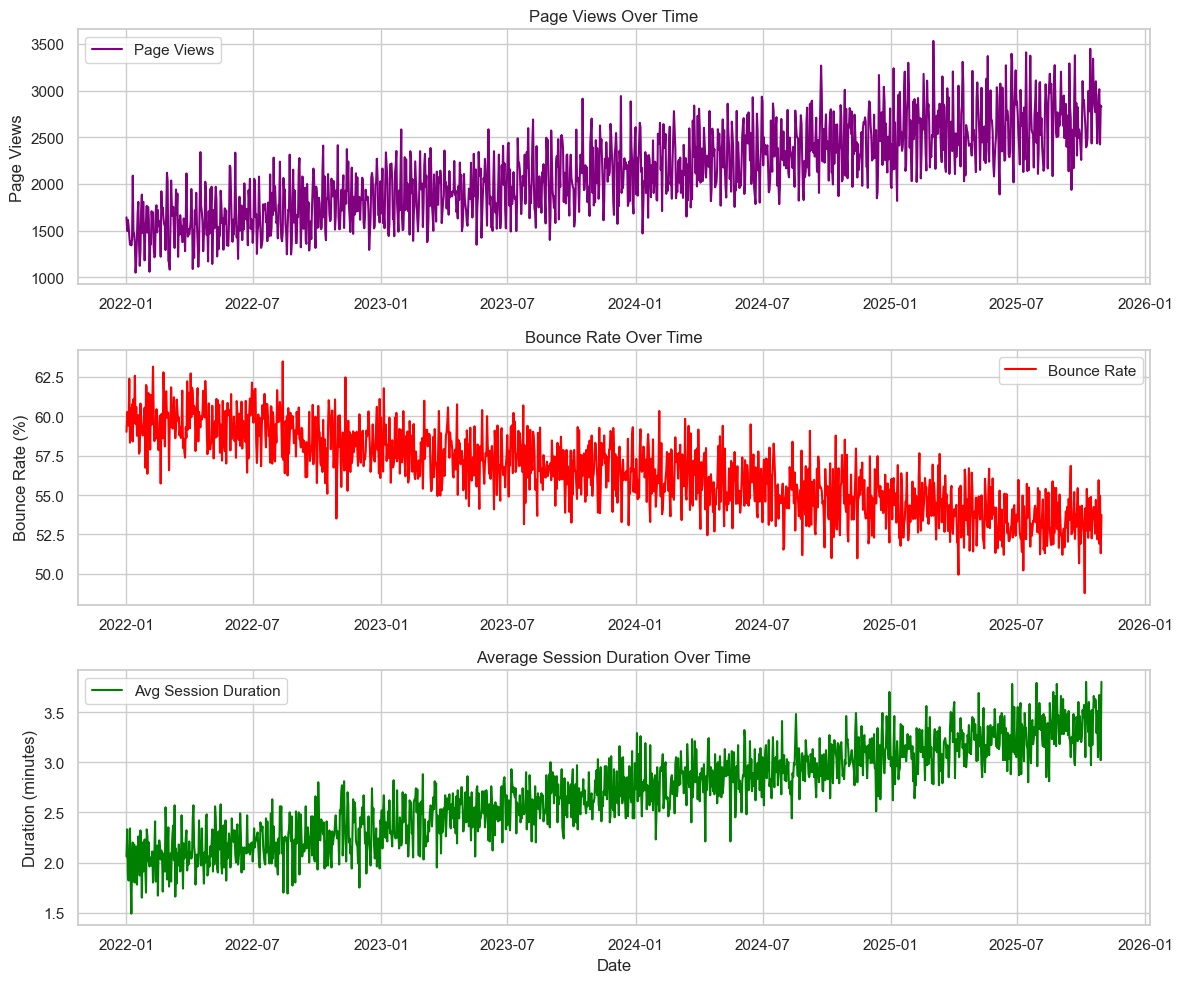

In [ ]:
# Visualize All Metrics - Page Views, Bounce Rate, Session Duration
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Page Views
axes[0].plot(df.index, df['Page_Views'], color='purple', label='Page Views')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Page Views Over Time')
axes[0].legend()
axes[0].grid(True)

# Bounce Rate
axes[1].plot(df.index, df['Bounce_Rate'], color='red', label='Bounce Rate')
axes[1].set_ylabel('Bounce Rate (%)')
axes[1].set_title('Bounce Rate Over Time')
axes[1].legend()
axes[1].grid(True)

# Average Session Duration
axes[2].plot(df.index, df['Avg_Session_Duration'], color='green', label='Avg Session Duration')
axes[2].set_ylabel('Duration (minutes)')
axes[2].set_xlabel('Date')
axes[2].set_title('Average Session Duration Over Time')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Step 12: Summary Statistics
print("Summary Statistics:")
print(df[['Visitors', 'Page_Views', 'Bounce_Rate', 'Avg_Session_Duration']].describe())

Summary Statistics:
          Visitors   Page_Views  Bounce_Rate  Avg_Session_Duration
count  1399.000000  1399.000000  1399.000000           1399.000000
mean    710.616869  2133.146533    56.501287              2.696676
std     140.232774   469.307781     2.502068              0.449145
min     364.000000  1051.000000    48.780000              1.490000
25%     604.000000  1779.500000    54.640000              2.340000
50%     707.000000  2120.000000    56.480000              2.700000
75%     818.500000  2469.500000    58.350000              3.050000
max    1053.000000  3531.000000    63.470000              3.800000
